# 領域(輪郭)の特徴
## 目的
このチュートリアルでは

* 領域(輪郭)の特徴である面積，周囲長，重心，外接矩形などについて学ぶ．
* 領域(輪郭)を対象とした様々な関数について学ぶ．

## 1. モーメント
画像のモーメントは物体の重心，面積などを計算するのに役立つ．詳細についてはWikipediaの <A HREF="https://ja.wikipedia.org/wiki/%E3%83%A2%E3%83%BC%E3%83%A1%E3%83%B3%E3%83%88_(%E6%95%B0%E5%AD%A6)#.E7.94.BB.E5.83.8F.E3.81.AE.E3.83.A2.E3.83.BC.E3.83.A1.E3.83.B3.E3.83.88" target="_blank">画像モーメント のページ</A>を参照せよ．

<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.moments#cv2.moments" target="_blank">cv2.moments(array[, binaryImage]))</A>関数は3次までのモーメントをすべて計算し、辞書形式の値を返す (コード, 注意: OpenCV2では返す値が違うためエラーになる):



In [21]:
%matplotlib inline
import cv2
import numpy as np

img = cv2.imread('star.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print( M )

{'m00': 7084.0, 'm10': 793363.5, 'm01': 789272.3333333333, 'm20': 96192050.83333333, 'm11': 88392298.08333333, 'm02': 95244143.0, 'm30': 12417164369.75, 'm21': 10717175853.45, 'm12': 10666347920.25, 'm03': 12238937164.1, 'mu20': 7340322.553794935, 'mu11': -1245.2292725294828, 'mu02': 7306421.915098205, 'mu30': 118900.22337341309, 'mu21': 102368.0694693327, 'mu12': -120317.32108485699, 'mu03': -910426.0239944458, 'nu20': 0.1462709356280521, 'nu11': -2.4813739373096024e-05, 'nu02': 0.14559539608544772, 'nu30': 2.8150511418787822e-05, 'nu21': 2.423640113328909e-05, 'nu12': -2.8486019832277142e-05, 'nu03': -0.00021555012646131037}


ここで計算したモーメントの中から面積や重心など、有用な情報を抽出する．重心は $C_x = \frac{M_{10}}{M_{00}}$ と $C_y = \frac{M_{01}}{M_{00}}$ の関係から求められる :

In [22]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print("cx = %d cy =%d "%(cx,cy))

cx = 111 cy =111 


図形とともに、その重心に青い円を描いて表示する。

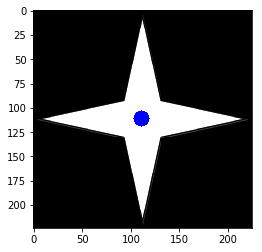

In [26]:
import matplotlib.pyplot as plt
img = cv2.cvtColor(cv2.imread('star.png'),cv2.COLOR_RGB2BGR)
cv2.circle(img,(cx,cy), 8, (0,0,255), -1)
plt.imshow(img)

## 2. 面積(Contour area)
領域が占める面積を計算するには <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.contourarea#contourarea" target="_blank">cv2.contourArea(contour[, oriented]) </A>関数を使うか，モーメントの結果を`M`として `M['m00']` で求める.

In [28]:
area = cv2.contourArea(cnt)
print(area)

7084.0


## 3. 周囲長(arc length)
領域を囲む周囲長(もしくは長さ)は <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.contourarea#contourarea" target="_blank">cv2.arcLength(curve, closed)</A> 関数を使って計算できます．第2引数`closed`は対象とする領域(輪郭)が閉じている(`True` を指定)か単なる曲線かを表すフラグである．

In [29]:
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

718.4751765727997


## 4. 輪郭の近似
複雑な形状をした輪郭を，より少ない数の点で単純な形状によって近似する．ここで近似する点の数はユーザが指定する．この関数は<A HREF="http://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm" target="_blank"> Douglas-Peucker algorithm </A>を実装したものである．アルゴリズムの詳細についてはWikipediaのページを参照すること．

輪郭の近似について理解するため、例を使って説明しよう，今、画像の中から矩形を見つけようとしているとする。ここで何らかの問題が生じたため、きちんとした形状の矩形が見つからず、 (下の最初の画像のように)“崩れた形” しかないとしよう．ここで <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.approxpolydp#cv2.approxPolyDP" target="_blank">cv2.approxPolyDP(curve, epsilon, closed[, approxCurve]) </A>関数を使ってこの形の近似を行ってみる。ここで第2引数は `epsilon` と呼ばれ，実際の輪郭と近似輪郭との許容可能な最大距離を表し，いわば近似の精度を表すパラメータである． `epsilon` を妥当な値に設定する事で，期待に沿った結果が得られる．

In [33]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print("epsilon = ",epsilon,"\napprox= ",list(approx))

epsilon =  71.84751765727997 
approx=  [array([[112,  10]], dtype=int32), array([[ 12, 111]], dtype=int32), array([[112, 212]], dtype=int32), array([[212, 111]], dtype=int32)]


以下の画像のうち，二番目の画像の緑の線は epsilon = 弧長の10% と設定したときの近似図形を表し，三番目の画像は epsilon = 弧長の1% と設定したときの近似図形を表す．第3引数は近似曲線が閉じた曲線か否かを表す( <A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_contours/py_contour_features/collapsedSquare.png">対象画像</A>)

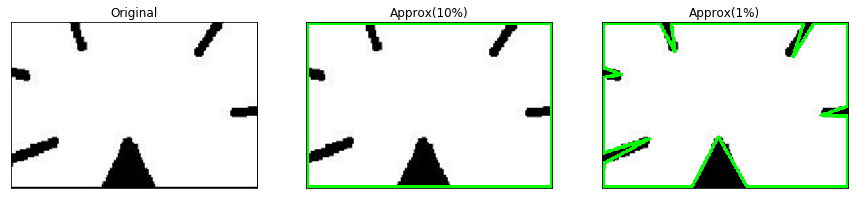

In [36]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('collapsedSquare.png')
# img = cv2.imread('star.png')
im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#ret,thresh = cv2.threshold(im,127,255,0)
ret,thresh = cv2.threshold(im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt=contours[0]
epsilon = 0.1*cv2.arcLength(cnt,True)

# print([cv2.arcLength(x,True) for x in contours])

approx = cv2.approxPolyDP(cnt,epsilon,True)

imR = img.copy()
imR=cv2.drawContours(imR, [approx], -1, (0,255,0), 4)

epsilon2 = 0.01*cv2.arcLength(cnt,True)
approx2 = cv2.approxPolyDP(cnt,epsilon2,True)
imC = img.copy()
imC=cv2.drawContours(imC, [approx2], -1, (0,255,0), 4)

plt.figure(figsize=(15,5))
plt.subplot(131),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imR)
plt.title('Approx(10%)'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(imC)
plt.title('Approx(1%)'), plt.xticks([]), plt.yticks([])

plt.show()

## 5. 凸包(Convex Hull)
凸包(Convex Hull)は輪郭の近似に似ているが，厳密には異なる処理である．

<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.convexhull#cv2.convexHull" target="_blank">cv2.convexHull(points[, hull[, clockwise[, returnPoints]]])</A> 関数は曲線の凸性の欠陥を調べ修正する．一般的に言うと，凸性を持つ曲線とは常に突き出るか少なくとも平坦な曲線を指す．内側にへこんでいる部分は凸性の欠陥(convexity defects)と呼ばれる．下の手の画像を例としてしよう．赤い線は手の凸包，両面矢印マークは輪郭から外郭の極大値となる凸性の欠陥を示す．

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/convexitydefects.jpg)

関数の使い方については少しだけ注意しておいたほうが良いだろう

```
hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]
```

入力引数の詳細:

* points :Convex Hullを計算する輪郭．
* hull : 出力ですが，普通は引数とはしない(戻り値と同じだから？)．
* clockwise : 傾きを表すフラグ． True を指定すると出力のconvex hullは時計回り，そうでなければ反時計回りの形式で出力される．
* returnPoints : convex hullの出力する情報を決めるフラグ． True を指定するとconvex hull上の点の座標， False を指定するとconvex hull上の点に対応する輪郭上の点のインデックスを返す．

まとめると，上記の画像のconvex hullを取得するコードは以下のようになります:

In [37]:
hull = cv2.convexHull(cnt)

もし凸性の欠陥を検出したい場合は `returnPoints = False` を指定する．その理由を理解してもらうために，上の長方形画像を例に使おう．まず初めに長方形の輪郭を cnt として検出する．この輪郭に対して `returnPoints = True `を指定したconvex hullを使うと以下のような出力を得る: `[[[234 202]], [[ 51 202]], [[ 51 79]], [[234 79]]] `これは長方形の4隅の点を指す．次に，全く同じ輪郭に対して `returnPoints = False` を指定すると以下のような出力になる: ` [[129],[ 67],[ 0],[142]]` ．これは各convex hull上の点に対応する輪郭上の点のインデックスの値になっており，最初の点を確認してみると: `cnt[129] = [[234, 202]] `となり，フラグを `True `にした時に得た出力と一致していることが分かる．

凸性の欠陥については後でまた議論する．

## 6. 凸性の確認
曲線の凸性を確認するための関数は <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.iscontour#cv2.isContourConvex" target="_blank">cv2.isContourConvex() </A>である．返戻値は`True` か `False` の二値の値である．

In [39]:
k = cv2.isContourConvex(cnt)

## 7. 外接矩形
外接矩形は2種類ある．

<font color="blue">注意</font>: 以下では<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_contours/py_contour_features/target.png">この図形</A>を対象として例を示す。


In [51]:
#このコードは以下で共通に使う
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('target.png')

im =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(im,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]


## 7.a. 外接矩形
単純な長方形であり、物体の回転を仮定していない．そのため外接矩形の面積は最小になる保証はない． これには<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=boundingrect#cv2.boundingRect" target="_blank">cv2.boundingRect()</A> 関数を使う．

外接矩形の左上の位置を`(x,y)`，横と縦のサイズを`(w,h)`とすると，以下のようになる．

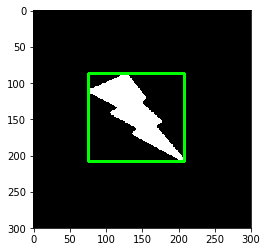

In [52]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(img)

### 7.b. 回転を考慮した外接矩形
もう一つの外接矩形は回転を考慮したものである．<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.minarea#cv2.minAreaRect" target="_blank"> cv2.minAreaRect() </A>を使う．戻り値は Box2D の構造(左上の点`(x,y)`，横と縦のサイズ`(width, height)`，回転角)であるが、この長方形を描画する時に必要な情報は長方形の4隅の点なので，<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.boxpoint#cv2.boxPoints" target="_blank"> cv2.boxPoints() </A>関数を使って計算する．



In [53]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgR = cv2.drawContours(imgR,[box],0,(255,0,0),3)

同一画像上に二つの外接矩形を描画する．緑の長方形が外接矩形，赤い長方形が回転を考慮した外接矩形である．

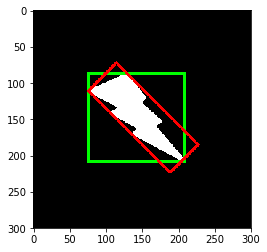

In [55]:
plt.imshow(imgR)

## 8. 最小外接円
物体の最小外接円を計算する時は<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=boundingrect#minenclosingcircle" target="_blank"> cv2.minEnclosingCircle()</A> 関数を使います．

In [58]:
#このコードは以下で共通に使う
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('target.png')

im =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(im,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]

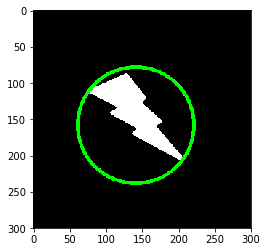

In [59]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
imgC = img.copy()
imgC = cv2.circle(imgC,center,radius,(0,255,0),3)
plt.imshow(imgC)

## 9. 楕円のフィッティング
物体に楕円をあてはめる時は <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=boundingrect#fitellipse" target="_blank">cv2.fitEllipse </A>関数を使う．出力は求めた楕円に外接する回転外接矩形になる．

In [63]:
#このコードは以下で共通に使う
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('target.png')

im =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(im,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]

In [64]:
ellipse = cv2.fitEllipse(cnt)
imgE = img.copy()
imgE = cv2.ellipse(imgE,ellipse,(0,255,0),3)

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/fitellipse.png)

## 10. 直線のフィッティング
楕円フィッティングと同様に，点の集合に対して直線のあてはめも可能である．それには<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=boundingrect#fitline" target="_blank"> cv2.fitLine</A>関数を用いる。次の画像は白色の点の集合に対して直線をフィッティングした結果である．

In [65]:
#このコードは以下で共通に使う
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('target.png')

im =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(im,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]

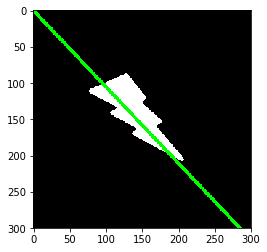

In [66]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
imgL = img.copy()
imgL = cv2.line(imgL,(cols-1,righty),(0,lefty),(0,255,0),3)
plt.imshow(imgL)

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* [OpenCVにおける輪郭(領域)]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contours.html)
* 前の学習項目 [輪郭: 初めの一歩 contoursStarted.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contoursStarted.html)<BR>
輪郭の検出及び描画方法を学ぶ．
* 次の学習項目 [輪郭に関するいろいろな関数 contourProperties.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contourProperties.html)<BR>
輪郭(領域)の属性情報（Solidityや平均値など）を学ぶ